#### pip install -r requirements.txt
-> 실험 환경에 사용된 패키지들을 그대로 다른 환경에서 설치하고 싶을때 사용.  
requirements.txt는 이러한 패키지와 버전 목록이 나열되어 있는 텍스트 파일이다.  
이름이 꼭 requirements.txt일 필요는 없지만 대부분 이렇게 사용하고 있으니 어지간하면 맞춰주자.

In [1]:
# 코랩이나 캐글을 사용한다면 이 셀의 주석을 제거하고 실행하세요.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=11)

fatal: destination path 'nlp-with-transformers' already exists and is not an empty directory.
/home/jj/github/NLP/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing torch-scatter for torch v2.0.1 ...
torch-scatter installed!
⏳ Installing soundfile ...
✅ soundfile installed!
🥳 Chapter installation complete!
Using transformers v4.31.0
Using datasets v2.14.4
Using accelerate v0.21.0
Using sentencepiece v0.1.99
Using torch_scatter v2.1.1


텍스트, 이미지, 오디오 같이 여러 도메인에 걸친 입력을 모델링하는 멀티모달 트랜스포머 multimodal transformer

# 11.1 트랜스포머 확장

In [2]:
model_data = [
    {'date': '12-06-2017', 'name': 'Transformer', 'size': 213*1e6},
    {'date': '11-06-2018', 'name': 'GPT', 'size': 110*1e6},
    {'date': '11-10-2018', 'name': 'BERT', 'size': 340*1e6},
    {'date': '14-02-2019', 'name': 'GPT-2', 'size': 1.5*1e9},
    {'date': '23-10-2019', 'name': 'T5', 'size': 11*1e9},
    {'date': '17-09-2019', 'name': 'Megatron', 'size': 8.3*1e9},
    {'date': '13-02-2020', 'name': 'Turing-NLG', 'size': 17*1e9},
    {'date': '30-06-2020', 'name': 'GShard', 'size': 600*1e9},
    {'date': '28-05-2020', 'name': 'GPT-3', 'size': 175*1e9},
    {'date': '11-01-2021', 'name': 'Switch-C', 'size': 1.571*10e12},
]


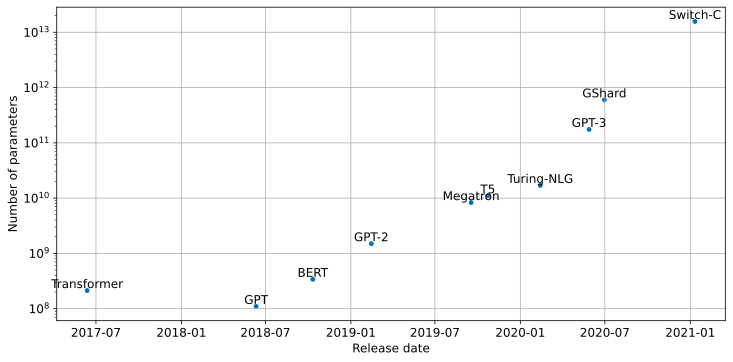

In [4]:
# 중요 트랜스포머 아키텍처의 파라미터 개수
import pandas as pd
import matplotlib.pyplot as plt

def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(
            point["x"],
            point["y"],
            str(point["val"]),
            horizontalalignment="center",
            verticalalignment="bottom",
        )


df_lm = pd.DataFrame.from_records(model_data)
df_lm["date"] = pd.to_datetime(df_lm["date"], dayfirst=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df_lm.plot(x="date", y="size", kind="scatter", s=15, ax=ax)
ax.set_yscale("log")
label_point(df_lm["date"], df_lm["size"], df_lm["name"], ax)
ax.set_xlabel("Release date")
ax.set_ylabel("Number of parameters")
ax.grid(True)
plt.subplots_adjust(top=1.2)
plt.show()
     

## 11.1.1 규모의 법칙

### -> 거듭제곱 법칙 P.436

### -> 샘플 효율성

## 11.1.2 규모 확장의 어려움

 ### -> 인프라

### -> 비용

### -> 데이터셋 큐레이션

### -> 모델평가

### -> 배포
openAI API  
higgingface's Accelerated Inference API

### -> BigScience
대규모 언어 모델에 초점을 둔 연구 워크샵

### -> EleutherAI
GPT-3 크기의 모델을 훈련하고 오픈소스로 공개하는 것을 목적으로 하는 단체  
GPT-NEO와 GPT-J 등 출시

## 11.1.3 어텐션 플리즈
여러 분야로 나뉜 어텐션 논문들 P.440

# 11.1.4 희소 어텐션


셀프 어텐션 층에서 수행되는 계산의 횟수를 줄이는 방법은 미리 정의된 패턴을 따라 생성되는 쿼리-키 쌍의 개수를 제한하는 것.

1. 글로벌 어텐션  
-> 시퀀스에서 다른 모든 토큰에 주의를 기울이는 몇 개의 특수한 토큰을 정의한다.
2. 밴드 어텐션band attention  
-> 대각선에 걸친 어텐션을 계산한다.
3. 팽창 어텐션dilated attention  
-> 간격을 둔 팽창 윈도dilated window를 사용해 일부 쿼리-키 쌍을 건너뛴다.
4. 랜덤 어텐션  
-> 쿼리마다 몇 개의 키를 랜덤하게 샘플링해 어텐션 점수를 계산한다.
5. 블록 로컬 어텐션  
-> 시퀀스를 블록으로 나누고 이 블록 안에서 어텐션 점수를 계산한다.

### 어텐션 행렬에 희소성을 추가하면 모델이 훨씬 긴 시퀀스를 처리한다.

Longformer와 BigBird의 경우 최대 시퀀스 길이는 4,096개 토큰으로 BERT보다 여덟 배 더 크다.

# 11.2 텍스트를 넘어서

## 11.2.1 비전
iGPT - image GPT  
ViT - 비전 트랜스포머

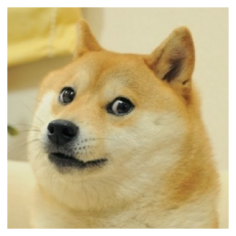

In [8]:
# ViT
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [9]:
# VIT 모델을 로드하기위해 image-classification 파이프라인을 지정하기.
# 그다음 이미지를 주입해 예측 클래스를 추출한다.

import pandas as pd
from transformers import pipeline

image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

,score,label
0,0.643600,"Eskimo dog, husky"
1,0.207405,Siberian husky
2,0.060160,"dingo, warrigal, warragal, Canis dingo"
3,0.035359,"Norwegian elkhound, elkhound"
4,0.012927,"malamute, malemute, Alaskan malamute"


### ※ 비디오의 경우 TimeSformer 같은 모델 사용. 이미지에서 시간차원도 가짐.

## 11.2.2  테이블
TAPAS(Table Parser)가 해결책이다.  
이 모델은 테이블 정보와 쿼리를 결합하는 식으로 트랜스포머 아키텍처를 테이블에 적용한다.  
TAPAS 모델을 활용하려면 모든 열의 타입이 str이어야 한다.

In [11]:
# TAPAS가 어떻게 작동하는지 예시

book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12, 
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74, 
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121, 
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141, 
     "end_page": 144}
]

In [13]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page'] + 1
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,11
1,1,Text classification,12,48,37
2,2,Named Entity Recognition,49,73,25
3,3,Question Answering,74,120,47
4,4,Summarization,121,140,20
5,5,Conclusion,141,144,4


### 먼저 table-question-answering 파이프라인을 로드한다.

In [14]:
table_qa = pipeline("table-question-answering")

### 그다음 쿼리를 전달해 답변을 추출한다.

In [15]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
           "What is the total number of pages?",
           "On which page does the chapter about question-answering start?",
           "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

### 예측 결과에는 답변과 함께 aggregator 필드에 테이블 연산의 종류가 저장됐다.
TAPAS가 질문을 얼마나 잘 처리했는지 확인해보자.

In [16]:
for query, pred in zip(queries, preds):
    print(query)
    print("Predicted answer: " + pred["answer"])
    print("="*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 11, 37, 25, 47, 20, 4
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


# 11.3 멀티모달 트랜스포머